# Introducción

"Tu primera red neuronal en Python y Tenserflow" --> https://www.youtube.com/watch?v=iX_on3VxZzk&t=153s

- Red neuronal --> compuesta por capas
- Las capas principales son las de entrada y salida (input y output)

# Importar librerías

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [7]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float) # 
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float) # Resultados en grados fahrenheit

# Diseñar modelo de red neuronal
se pueden especificar capas de entrada y de salida

- Capa de tipo densa --> tiene conexión desde cada neurona hacia todas las neuronas de la siguiente capa
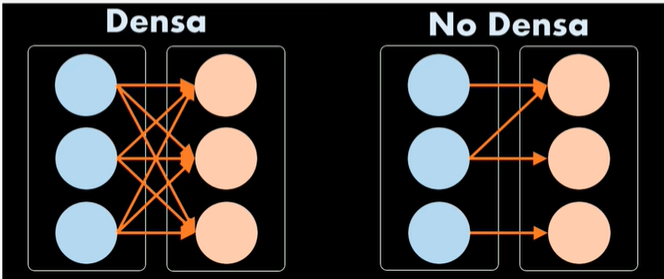

In [8]:
# units = 1 Unidades o neuronas de la capa llamada "capa"
# input_shape = [1] Entrada con una neurona nos auto registra la capa de entrada con una neurona

capa = tf.keras.layers.Dense(units=1, input_shape=[1])

# En este momento la capa está volando y necesita un modelo usaremos el modelo secuencial ya que es un modelo básico

modelo = tf.keras.Sequential([capa])

# Compilación

Compilación para entrenar el modelo, queremos el optimizador y función de perdida

- Optimizador (adam) --> pesos y sesgos asignados de manera eficiente, se le asigna la tasa de aprendizaje, entre más pequeños "más precisos" menores a 0.1
- Función de perdida --> Error cuadratico medio, quiere decir que poca cantidad de errores grandes < poca cantidad de errores pequeños

In [10]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = "mean_squared_error")

# Entrenamiento
- indicamos los datos de entrada al inicio "celsius" y luego indicamos los datos de resultados esperados "fahrenheit"
- le decimos las vueltas que queremos que lo intente "epochs"
- verbose = False es para que no salga texto mientras entrena

In [11]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs = 700, verbose = False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


# Resultado de la función de perdida

nos dice que tan mala están los resultados de la red en cada vuelta que dio

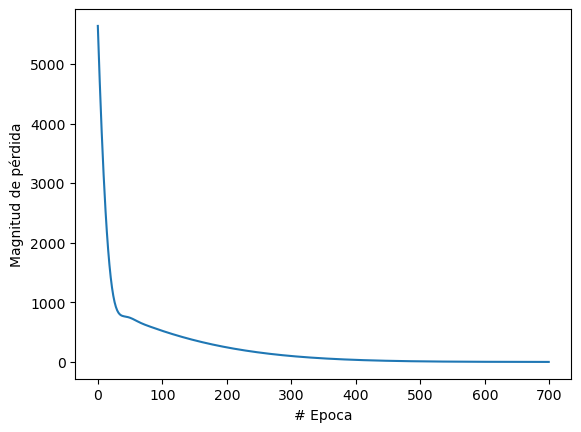

In [12]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

# Hacer nuestra primera predicción

In [13]:
print("¡Hagamos un predicción!")
print("¿Cuanto es 100.0 celsius?")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit")

¡Hagamos un predicción!
¿Cuanto es 100.0 celsius?
1/1 [==============================] - 0s 86ms/step
El resultado es [[211.64418]] fahrenheit


# Jugando con bases de datos

In [2]:
Base_datos = pd.read_csv("Base_datos.csv")
Base_datos

,FECHA,LATITUD,LONGITUD,CONTEO,Humedad,Temperatura,Pmm_radar,geometry,Ocurrencia
0,2012-01-01 13:05:00,6.142000,-75.633000,1,0.00,23.6557,NaN,POINT (-75.633 6.142),1
1,2012-01-01 14:55:00,6.128000,-75.638000,1,0.00,23.1226,NaN,POINT (-75.63800000000001 6.128),1
2,2012-01-01 17:46:00,6.322000,-75.539000,1,0.00,23.6717,NaN,POINT (-75.539 6.322),1
3,2012-01-01 18:45:00,6.352000,-75.552000,1,0.00,23.8115,NaN,POINT (-75.55200000000001 6.352),1
4,2012-01-02 17:28:00,6.105000,-75.633000,1,0.00,22.9603,NaN,POINT (-75.633 6.105),1
...,...,...,...,...,...,...,...,...,...
6731,2020-03-14 15:56:00,6.337110,-75.558660,1,59.00,27.1600,16.801123,POINT (-75.55866 6.33711),0
6732,2020-03-15 14:14:00,6.271891,-75.631123,1,37.80,25.2000,16.529131,POINT (-75.631123 6.271891),0
6733,2020-03-15 14:16:00,6.230240,-75.609970,1,37.02,27.7300,18.427731,POINT (-75.60997 6.23024),0
6734,2020-03-16 15:42:00,6.271891,-75.631123,1,41.10,25.0000,14.298922,POINT (-75.631123 6.271891),0


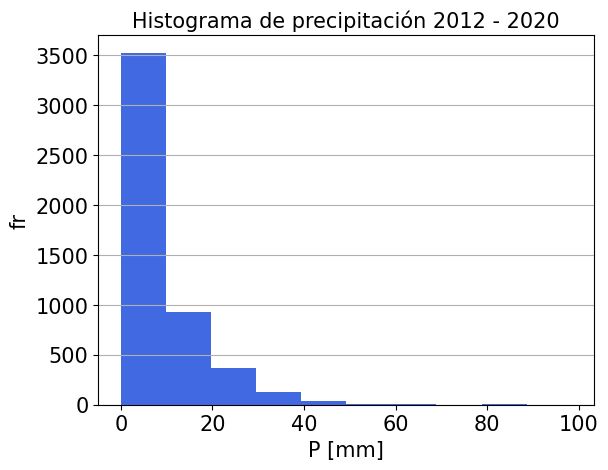

In [3]:
import matplotlib.pyplot as plt

plt.hist(Base_datos["Pmm_radar"],color="royalblue")
plt.yticks(fontsize=15)
plt.xticks(size=15)
plt.xlabel("P [mm]", loc="center", fontsize = 15)
plt.ylabel("fr", loc="center", fontsize = 15)
plt.title("Histograma de precipitación 2012 - 2020", loc = "center", size="15")
plt.grid(axis='y')
plt.savefig('Histograma de precipitación 2012 - 2020.png', dpi=300, bbox_inches='tight')